In [1]:
# Importing the needed libraries and reading the csv file.
import numpy as np
import pandas as pd

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

iot = pd.read_csv('IOT-temp.csv', parse_dates = ['noted_date'])
iot

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,2018-08-12 09:30:00,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,2018-08-12 09:30:00,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,2018-08-12 09:29:00,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,2018-08-12 09:29:00,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,2018-08-12 09:29:00,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,2018-07-28 07:07:00,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,2018-07-28 07:07:00,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,2018-07-28 07:06:00,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,2018-07-28 07:06:00,31,In


In [2]:
# Dropping irrelevant columns
cols = ['id', 'room_id/id']
iot = iot.drop(cols,axis = 1)
iot


,noted_date,temp,out/in
0,2018-08-12 09:30:00,29,In
1,2018-08-12 09:30:00,29,In
2,2018-08-12 09:29:00,41,Out
3,2018-08-12 09:29:00,41,Out
4,2018-08-12 09:29:00,31,In
...,...,...,...
97601,2018-07-28 07:07:00,31,In
97602,2018-07-28 07:07:00,31,In
97603,2018-07-28 07:06:00,31,In
97604,2018-07-28 07:06:00,31,In


### Checking for missing values:

In [3]:
# checking for missing values.
iot.isnull()

,noted_date,temp,out/in
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
97601,False,False,False
97602,False,False,False
97603,False,False,False
97604,False,False,False


In [4]:
iot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   noted_date  97606 non-null  datetime64[ns]
 1   temp        97606 non-null  int64         
 2   out/in      97606 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.2+ MB


From the info above, there are no missing values. Checking for any duplicate rows:

In [5]:
iot.duplicated()

0        False
1         True
2        False
3         True
4        False
         ...  
97601     True
97602     True
97603    False
97604     True
97605     True
Length: 97606, dtype: bool

There are some duplicate rows, so we remove them.

In [6]:
# Dropping duplicate rows
rows_drop = ['temp', 'out/in', 'noted_date']
iot.drop_duplicates(subset = rows_drop, keep = False, inplace = True)
iot

,noted_date,temp,out/in
38,2018-08-12 09:05:00,29,In
39,2018-08-12 09:04:00,42,Out
40,2018-08-12 09:04:00,30,In
41,2018-08-12 09:04:00,29,In
42,2018-08-12 09:03:00,42,Out
...,...,...,...
97565,2018-07-28 07:15:00,32,Out
97568,2018-07-28 07:10:00,31,In
97569,2018-07-28 07:09:00,32,Out
97570,2018-07-28 07:09:00,33,Out


In [7]:
iot.describe()

,temp
count,23075.000000
mean,38.068689
std,6.426103
min,22.000000
25%,32.000000
50%,39.000000
75%,44.000000
max,51.000000


We can see that the minimum temperature is 22 and the maximum temperature is 51. Next,we are going to identify any relationship between the outside and inside temperatures.

In [8]:
# Here, i am just rounding the noted time to the nearest hour.
iot['noted_hour'] = iot.noted_date.apply(lambda n:datetime.strftime(n, '%H'))

In [9]:
# Making seperate columns for the inside and outside temperatures using the mean temperatures for every hour.
#This was done only for one day.
iot = iot.groupby(['noted_hour', 'out/in']).temp.mean().reset_index()
iot = iot.pivot(index = 'noted_hour', columns = 'out/in', values = 'temp').reset_index().dropna()
iot


out/in,noted_hour,In,Out
0,00,31.723270,39.633103
1,01,32.263473,39.190352
2,02,31.910345,38.411250
3,03,30.646259,39.420673
4,04,30.713178,40.433862
5,05,30.431746,41.468493
6,06,30.371105,43.036220
7,07,30.462766,42.601286
8,08,31.068966,42.417169
9,09,30.903485,41.073025


### VISUALIZATIONS😁👌

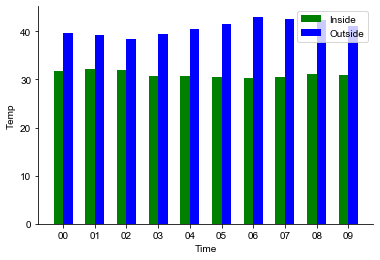

In [10]:
#Using stacked barchart to compare inside and outside temperatures for the first 10 rows.
time = iot.noted_hour.iloc[0:10]

in_temp = iot.In.iloc[0:10]
out_temp = iot.Out.iloc[0:10]

index = np.arange(10)
width = 0.30

plt.bar(index, in_temp, width, color = 'green', label = 'Inside')
plt.bar(index+width, out_temp, width, color = 'blue', label = 'Outside')

plt.ylabel('Temp')
plt.xlabel('Time')
plt.xticks(index+ width/2, time)

plt.legend(loc = 'best')
sns.set()
sns.despine()
plt.show()



<function matplotlib.pyplot.show(*args, **kw)>

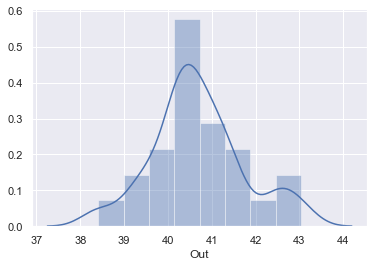

In [11]:
#Using distplot to show outside temperature.
sns.distplot(iot.Out)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

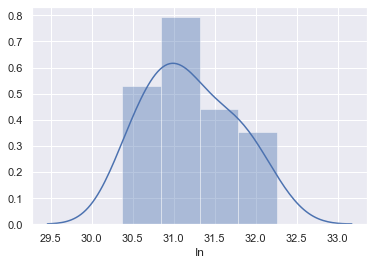

In [12]:
#Using distplot to show inside temperature.
sns.distplot(iot.In)
plt.show